In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [700]:
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import randint


In [551]:
train=pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Zindi_Hackathon\Train.csv")
riders=pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Zindi_Hackathon\Riders.csv")

In [552]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [555]:
train.shape

(21201, 29)

In [556]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [557]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [558]:
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [559]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [560]:
riders.shape

(960, 5)

In [561]:
riders.columns

Index(['Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'], dtype='object')

In [562]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [563]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [564]:
riders.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


Cleaning the train data.

In [565]:
#missing values
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [566]:
# Propotion of null values.
train.isnull().sum()/len(train)

Order No                                     0.000000
User Id                                      0.000000
Vehicle Type                                 0.000000
Platform Type                                0.000000
Personal or Business                         0.000000
Placement - Day of Month                     0.000000
Placement - Weekday (Mo = 1)                 0.000000
Placement - Time                             0.000000
Confirmation - Day of Month                  0.000000
Confirmation - Weekday (Mo = 1)              0.000000
Confirmation - Time                          0.000000
Arrival at Pickup - Day of Month             0.000000
Arrival at Pickup - Weekday (Mo = 1)         0.000000
Arrival at Pickup - Time                     0.000000
Pickup - Day of Month                        0.000000
Pickup - Weekday (Mo = 1)                    0.000000
Pickup - Time                                0.000000
Arrival at Destination - Day of Month        0.000000
Arrival at Destination - Wee

In [567]:
merged_df=pd.merge(train,riders,on="Rider Id")

In [568]:
merged_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


In [569]:
merged_df.shape

(21201, 33)

In [570]:
merged_df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

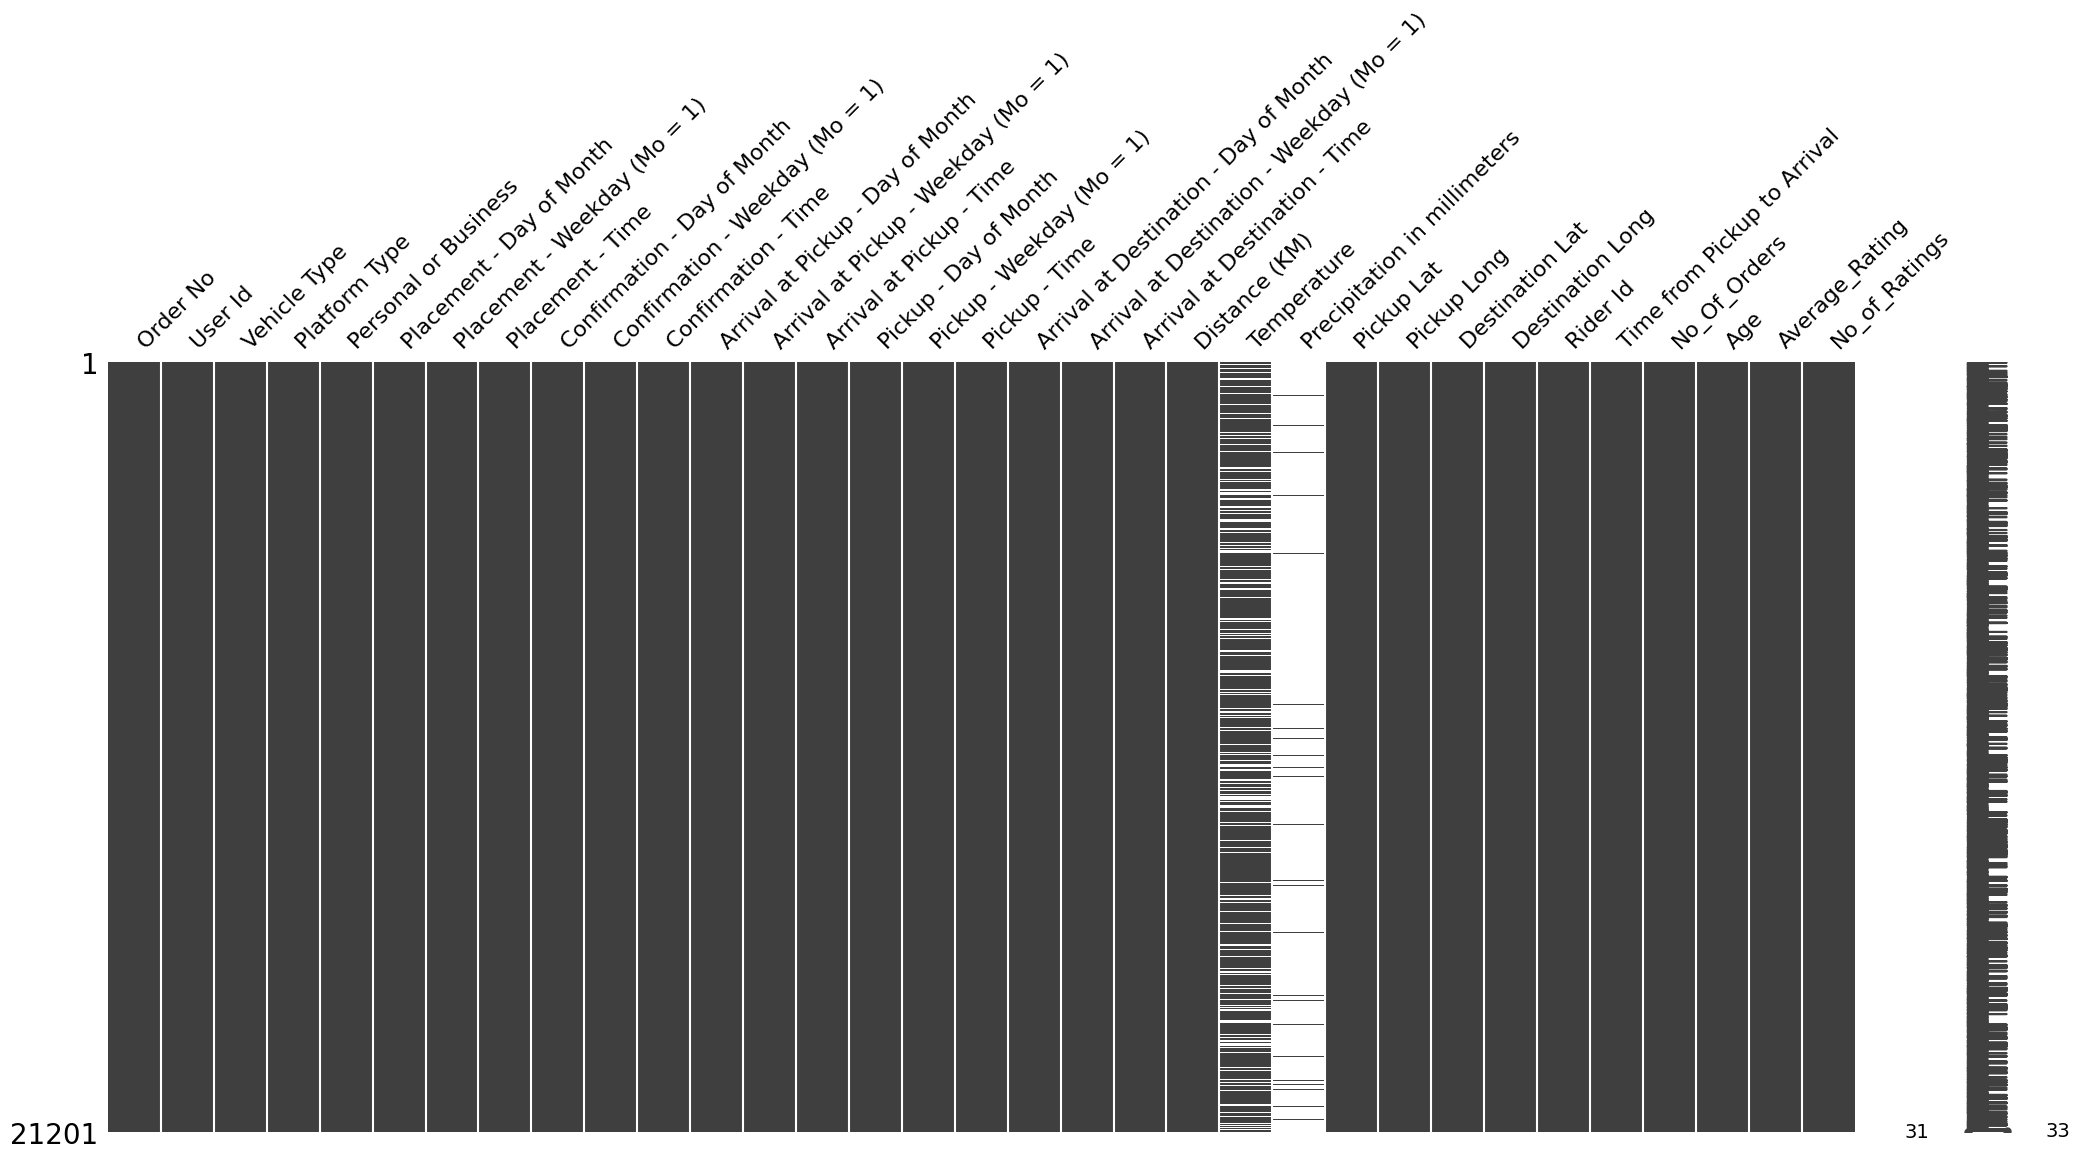

In [571]:
# Used it to understand the pattern of missing values.
msno.matrix(merged_df)
plt.show()

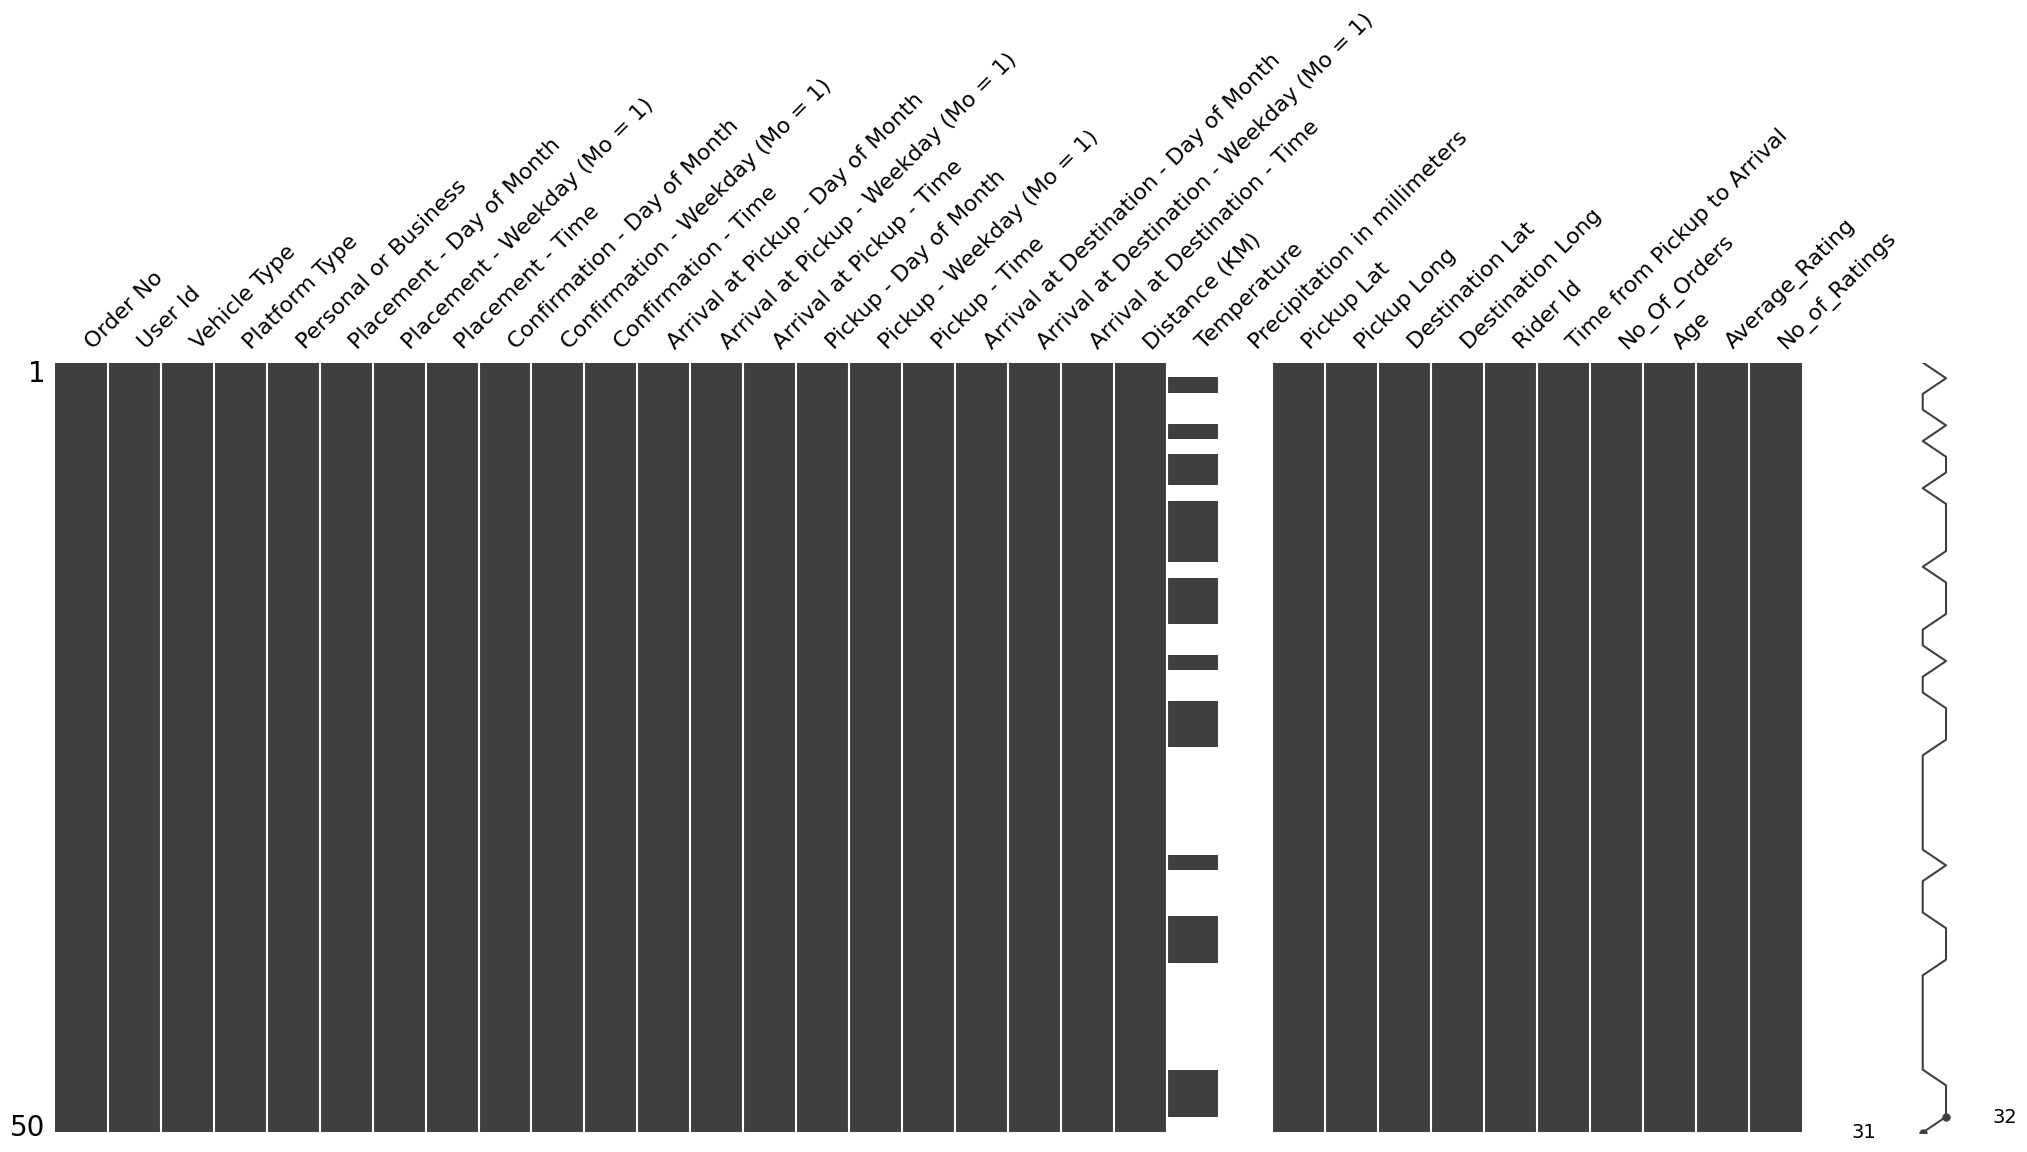

In [572]:
msno.matrix(merged_df.iloc[50:100])
plt.show()

In [573]:
#drop precipitation and temperature columns
col =['Temperature', 'Precipitation in millimeters']
merged_df =merged_df.drop(columns = col)

In [574]:
merged_df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

convert dtypes

In [575]:
# Working on user no column, and converting it to int dtype.
merged_df["User Id"]=merged_df["User Id"].str.replace("User_Id_","")
merged_df['Order No'] = merged_df['Order No'].str.replace('Order_No_', '')
merged_df['Rider Id'] = merged_df['Rider Id'].str.replace('Rider_Id_','')


In [576]:
merged_df[['Order No', 'User Id','Rider Id']] = merged_df [['Order No', 'User Id','Rider Id']].astype(int)


###### working on time columns

In [577]:
merged_df[['Placement - Time', 'AM/PM']] = merged_df['Placement - Time'].str.split(' ', expand=True)

In [578]:
merged_df['Placement - Time'] = pd.to_datetime(merged_df['Placement - Time'], format='%H:%M:%S')

In [579]:
def apply_am_pm(row):
    if row['AM/PM'] == 'PM' and row['Placement - Time'].hour < 12:
        return row['Placement - Time'] + timedelta(hours=12)
    elif row['AM/PM'] == 'AM' and row['Placement - Time'].hour == 12:
        return row['Placement - Time'] - timedelta(hours=12)
    else:
        return row['Placement - Time']

In [580]:
merged_df['Placement - Time'] = merged_df.apply(apply_am_pm, axis=1)


In [581]:
merged_df.drop('AM/PM', axis=1, inplace=True)


In [582]:
merged_df['Placement - Time'] = merged_df['Placement - Time'].apply(lambda x: datetime.combine(pd.to_datetime('today').date(), x.time()))

In [583]:
merged_df[['Arrival at Destination - Time', 'AM/PM']] = merged_df['Arrival at Destination - Time'].str.split(' ', expand=True)
merged_df['Arrival at Destination - Time'] = pd.to_datetime(merged_df['Arrival at Destination - Time'], format='%H:%M:%S')

In [584]:
def apply_am_pm(row):
    if row['AM/PM'] == 'PM' and row['Arrival at Destination - Time'].hour < 12:
        return row['Arrival at Destination - Time'] + timedelta(hours=12)
    elif row['AM/PM'] == 'AM' and row['Arrival at Destination - Time'].hour == 12:
        return row['Arrival at Destination - Time'] - timedelta(hours=12)
    else:
        return row['Arrival at Destination - Time']

In [585]:
merged_df['Arrival at Destination - Time'] = merged_df.apply(apply_am_pm, axis=1)
merged_df.drop('AM/PM', axis=1, inplace=True)

In [586]:
merged_df["Arrival at Destination - Time"] = pd.to_datetime(merged_df["Arrival at Destination - Time"], format="%H:%M:%S").apply(lambda x: datetime.combine(pd.to_datetime("today").date(), x.time()))

In [587]:
merged_df["Time taken"] = merged_df["Arrival at Destination - Time"] - merged_df["Placement - Time"]

merged_df["Time taken (minutes)"] = ((merged_df["Arrival at Destination - Time"] - merged_df["Placement - Time"]).dt.total_seconds() / 60).round()

In [588]:
merged_df[['Arrival at Pickup - Time', 'AM/PM']] = merged_df['Arrival at Pickup - Time'].str.split(' ', expand=True)
merged_df['Arrival at Pickup - Time'] = pd.to_datetime(merged_df['Arrival at Pickup - Time'], format='%H:%M:%S')

In [589]:
def apply_am_pm(row):
    if row['AM/PM'] == 'PM' and row['Arrival at Pickup - Time'].hour < 12:
        return row['Arrival at Pickup - Time'] + timedelta(hours=12)
    elif row['AM/PM'] == 'AM' and row['Arrival at Pickup - Time'].hour == 12:
        return row['Arrival at Pickup - Time'] - timedelta(hours=12)
    else:
        return row['Arrival at Pickup - Time']
merged_df['Arrival at Pickup - Time'] = merged_df.apply(apply_am_pm, axis=1)

In [590]:
merged_df.drop('AM/PM', axis=1, inplace=True)

In [591]:
merged_df["Arrival at Pickup - Time"] = pd.to_datetime(merged_df["Arrival at Pickup - Time"], format="%H:%M:%S").apply(lambda x: datetime.combine(pd.to_datetime("today").date(), x.time()))

In [592]:
merged_df[['Confirmation - Time', 'AM/PM']] = merged_df['Confirmation - Time'].str.split(' ', expand=True)

In [593]:
merged_df['Confirmation - Time'] = pd.to_datetime(merged_df['Confirmation - Time'], format='%H:%M:%S')

In [594]:
def apply_am_pm(row):
    if row['AM/PM'] == 'PM' and row['Confirmation - Time'].hour < 12:
        return row['Confirmation - Time'] + timedelta(hours=12)
    elif row['AM/PM'] == 'AM' and row['Confirmation - Time'].hour == 12:
        return row['Confirmation - Time'] - timedelta(hours=12)
    else:
        return row['Confirmation - Time']

merged_df['Confirmation - Time'] = merged_df.apply(apply_am_pm, axis=1)

In [595]:
merged_df.drop('AM/PM', axis=1, inplace=True)

In [596]:
merged_df['Confirmation - Time'] = merged_df['Confirmation - Time'].apply(lambda x: datetime.combine(pd.to_datetime('today').date(), x.time()))

In [597]:
merged_df[['Pickup - Time', 'AM/PM']] = merged_df['Pickup - Time'].str.split(' ', expand=True)
merged_df['Pickup - Time'] = pd.to_datetime(merged_df['Pickup - Time'], format= '%H:%M:%S')

In [598]:
def apply_am_pm(row):
    if row['AM/PM'] == 'PM' and row['Pickup - Time'].hour < 12:
        return row['Pickup - Time'] + timedelta(hours=12)
    elif row['AM/PM'] == 'AM' and row['Pickup - Time'].hour == 12:
        return row['Pickup - Time'] - timedelta(hours=12)
    else:
        return row['Pickup - Time']
    
merged_df['Pickup - Time'] = merged_df.apply(apply_am_pm, axis=1)


In [599]:
merged_df.drop('AM/PM', axis=1, inplace=True)

In [600]:
merged_df['Pickup - Time'] = merged_df['Pickup - Time'].apply(lambda x: datetime.combine(pd.to_datetime('today').date(), x.time()))

In [601]:
merged_df.dtypes

Order No                                               int32
User Id                                                int32
Vehicle Type                                          object
Platform Type                                          int64
Personal or Business                                  object
Placement - Day of Month                               int64
Placement - Weekday (Mo = 1)                           int64
Placement - Time                              datetime64[ns]
Confirmation - Day of Month                            int64
Confirmation - Weekday (Mo = 1)                        int64
Confirmation - Time                           datetime64[ns]
Arrival at Pickup - Day of Month                       int64
Arrival at Pickup - Weekday (Mo = 1)                   int64
Arrival at Pickup - Time                      datetime64[ns]
Pickup - Day of Month                                  int64
Pickup - Weekday (Mo = 1)                              int64
Pickup - Time           

###### extract time features

In [602]:
#extracting hour component for Placement - Time Pickup - Time Arrival at Destination - Time
merged_df['Placement_hour_component'] = merged_df['Placement - Time'].dt.hour

In [603]:
merged_df['Pickup_hour_component'] = merged_df['Pickup - Time'].dt.hour

In [604]:
merged_df['Destination_hour_component'] = merged_df['Arrival at Destination - Time'].dt.hour

In [605]:
morning_rush_start = pd.to_datetime('07:00:00', format='%H:%M:%S').time()
morning_rush_end = pd.to_datetime('09:00:00', format='%H:%M:%S').time()
evening_rush_start = pd.to_datetime('17:00:00', format='%H:%M:%S').time()
evening_rush_end = pd.to_datetime('19:30:00', format='%H:%M:%S').time()

###### rushhour features

In [606]:
merged_df['rush_hour_placement'] = ((merged_df['Placement - Time'].dt.time >= morning_rush_start) &
                                    (merged_df['Placement - Time'].dt.time <= morning_rush_end)) | \
                                    ((merged_df['Placement - Time'].dt.time >= evening_rush_start) &
                                    (merged_df['Placement - Time'].dt.time <= evening_rush_end))

In [607]:
merged_df['rush_hour_pickup'] = ((merged_df['Pickup - Time'].dt.time >= morning_rush_start) &
                                    (merged_df['Pickup - Time'].dt.time <= morning_rush_end)) | \
                                    ((merged_df['Pickup - Time'].dt.time >= evening_rush_start) &
                                    (merged_df['Pickup - Time'].dt.time <= evening_rush_end))

In [608]:
merged_df['rush_hour_destination'] = ((merged_df['Arrival at Destination - Time'].dt.time >= morning_rush_start) &
                                    (merged_df['Arrival at Destination - Time'].dt.time <= morning_rush_end)) | \
                                    ((merged_df['Arrival at Destination - Time'].dt.time >= evening_rush_start) &
                                    (merged_df['Arrival at Destination - Time'].dt.time <= evening_rush_end))

In [610]:
merged_df.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Average_Rating,No_of_Ratings,Time taken,Time taken (minutes),Placement_hour_component,Pickup_hour_component,Destination_hour_component,rush_hour_placement,rush_hour_pickup,rush_hour_destination
0,4211,633,Bike,3,Business,9,5,2024-05-14 09:35:46,9,5,...,13.8,549,0 days 01:04:09,64.0,9,10,10,False,False,False
1,27440,2642,Bike,3,Personal,18,5,2024-05-14 15:41:17,18,5,...,13.8,549,0 days 01:20:26,80.0,15,16,17,False,False,True


In [611]:
#converting the two object columns to categorical columns
merged_df[['Vehicle Type','Personal or Business']] = merged_df[['Vehicle Type','Personal or Business']].astype('category')

###### working on extracting location features

In [612]:
# in extracting location features, the concept is that we are working on proximity of pick up or drop up based on how close or far it is from the city center, surban or 'rural' which supposedly is important in predicting delivery time. 
#It is grouped within three zones, city center, surban areas and rural areas and is calculated based on radius from the city center.
# The figures used are based on research presented in this article: https://civicdatadesignlab.mit.edu/Moving-in-Nairobi


In [613]:
max_coords = merged_df[['Destination Lat', 'Destination Long', 'Pickup Lat', 'Pickup Long' ]].max()
max_coords

Destination Lat     -1.030225
Destination Long    37.016779
Pickup Lat          -1.147170
Pickup Long         36.991046
dtype: float64

In [614]:
min_coords = merged_df[['Destination Lat', 'Destination Long', 'Pickup Lat', 'Pickup Long' ]].min()
min_coords

Destination Lat     -1.430298
Destination Long    36.606594
Pickup Lat          -1.438302
Pickup Long         36.653621
dtype: float64

 - Nairobi and its environs

In [615]:
# for this case Nairobi Point Zero coordinates are used
city_center = (-1.2857966, 36.8195652)
               

In [616]:
max_dist = merged_df['Distance (KM)'].max()
max_dist

49

In [617]:
min_dist = merged_df['Distance (KM)'].min()
min_dist

1

In [618]:
#defining the radius
city_center_radius = 5 
suburban_area_radius = 7 
rural_area_radius = 15

In [619]:
def determine_area(distance):
    if distance <= city_center_radius:
        return 'City Center'
    elif distance <= suburban_area_radius:
        return 'Suburban Area'
    else:
        return 'Outskirts'
merged_df['Area'] = merged_df['Distance (KM)'].apply(determine_area)

In [621]:
merged_df['Area'] = pd.Categorical(merged_df['Area'], categories=['City Center', 'Suburban Area', 'Outskirts'], ordered=True)

In [623]:
merged_df['Area_encoded'] = merged_df['Area'].cat.codes

In [624]:
merged_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Time taken,Time taken (minutes),Placement_hour_component,Pickup_hour_component,Destination_hour_component,rush_hour_placement,rush_hour_pickup,rush_hour_destination,Area,Area_encoded
0,4211,633,Bike,3,Business,9,5,2024-05-14 09:35:46,9,5,...,0 days 01:04:09,64.0,9,10,10,False,False,False,City Center,0
1,27440,2642,Bike,3,Personal,18,5,2024-05-14 15:41:17,18,5,...,0 days 01:20:26,80.0,15,16,17,False,False,True,Outskirts,2
2,14170,3339,Bike,3,Business,31,5,2024-05-14 12:51:41,31,5,...,0 days 01:25:02,85.0,12,13,14,False,False,False,Suburban Area,1
3,21727,3523,Bike,3,Personal,2,2,2024-05-14 07:12:10,2,2,...,0 days 01:16:22,76.0,7,7,8,True,True,True,Outskirts,2
4,8301,87,Bike,2,Personal,22,2,2024-05-14 10:40:58,22,2,...,0 days 00:45:24,45.0,10,10,11,False,False,False,Suburban Area,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,27103,3718,Bike,3,Business,13,2,2024-05-14 11:09:37,13,2,...,0 days 00:58:30,58.0,11,11,12,False,False,False,City Center,0
21197,3786,1558,Bike,3,Personal,21,4,2024-05-14 16:33:17,21,4,...,0 days 01:16:27,76.0,16,17,17,False,True,True,Suburban Area,1
21198,7281,2008,Bike,3,Business,10,1,2024-05-14 17:00:40,10,1,...,0 days 01:46:55,107.0,17,18,18,True,True,True,Suburban Area,1
21199,15575,1346,Bike,3,Business,29,2,2024-05-14 14:31:55,29,2,...,0 days 00:28:25,28.0,14,14,15,False,False,False,City Center,0


#encding area column

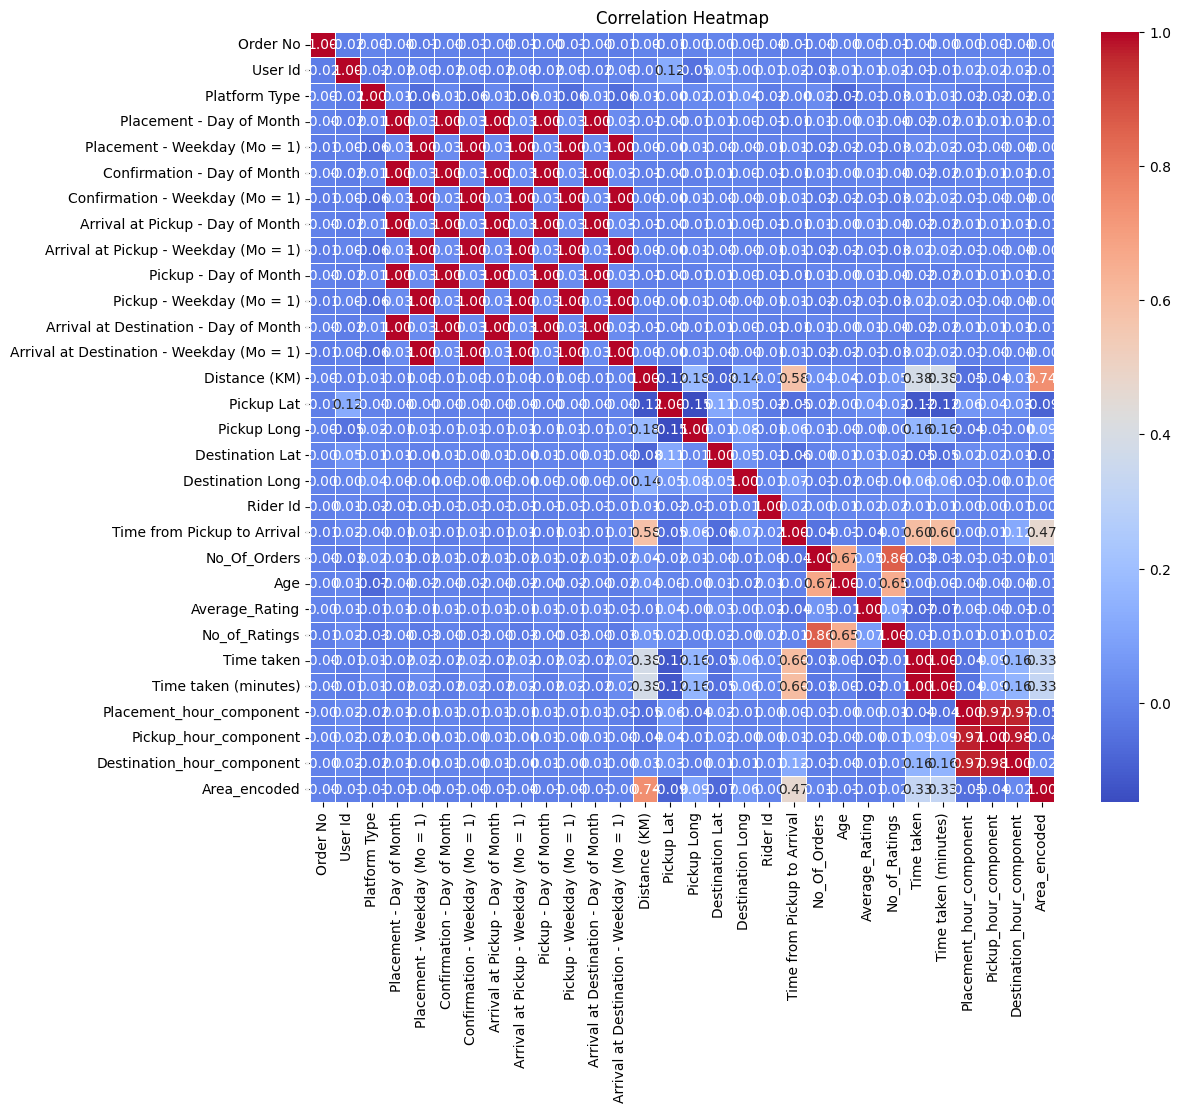

In [625]:
# Select numerical columns for correlation analysis
numerical_columns = merged_df.select_dtypes(include=['number']).columns

# Calculate correlation matrix
corr_matrix = merged_df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Number of ratings influences the number of orders by 86%

The time from pickup to arrival is influenced by distance(58%)

Age influences an increase in the number of orders by 67%


In [626]:
merged_df.isnull().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Pickup Lat   

In [627]:
merged_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Time taken,Time taken (minutes),Placement_hour_component,Pickup_hour_component,Destination_hour_component,rush_hour_placement,rush_hour_pickup,rush_hour_destination,Area,Area_encoded
0,4211,633,Bike,3,Business,9,5,2024-05-14 09:35:46,9,5,...,0 days 01:04:09,64.0,9,10,10,False,False,False,City Center,0
1,27440,2642,Bike,3,Personal,18,5,2024-05-14 15:41:17,18,5,...,0 days 01:20:26,80.0,15,16,17,False,False,True,Outskirts,2
2,14170,3339,Bike,3,Business,31,5,2024-05-14 12:51:41,31,5,...,0 days 01:25:02,85.0,12,13,14,False,False,False,Suburban Area,1
3,21727,3523,Bike,3,Personal,2,2,2024-05-14 07:12:10,2,2,...,0 days 01:16:22,76.0,7,7,8,True,True,True,Outskirts,2
4,8301,87,Bike,2,Personal,22,2,2024-05-14 10:40:58,22,2,...,0 days 00:45:24,45.0,10,10,11,False,False,False,Suburban Area,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,27103,3718,Bike,3,Business,13,2,2024-05-14 11:09:37,13,2,...,0 days 00:58:30,58.0,11,11,12,False,False,False,City Center,0
21197,3786,1558,Bike,3,Personal,21,4,2024-05-14 16:33:17,21,4,...,0 days 01:16:27,76.0,16,17,17,False,True,True,Suburban Area,1
21198,7281,2008,Bike,3,Business,10,1,2024-05-14 17:00:40,10,1,...,0 days 01:46:55,107.0,17,18,18,True,True,True,Suburban Area,1
21199,15575,1346,Bike,3,Business,29,2,2024-05-14 14:31:55,29,2,...,0 days 00:28:25,28.0,14,14,15,False,False,False,City Center,0


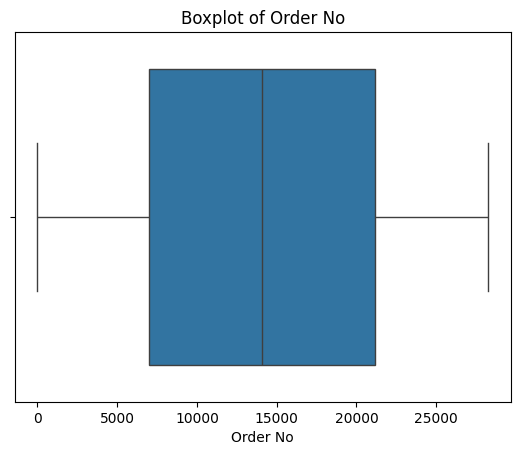

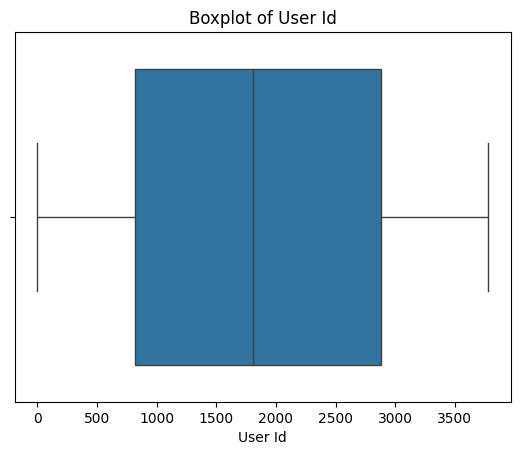

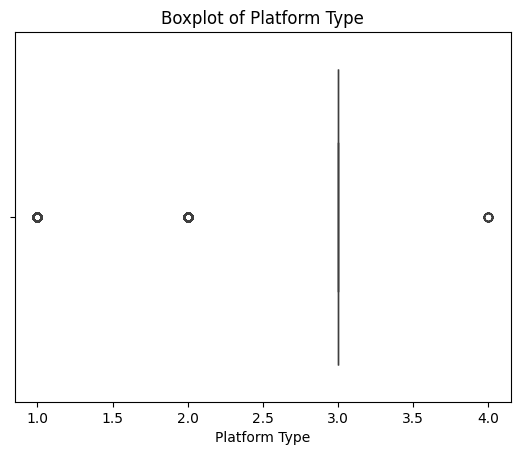

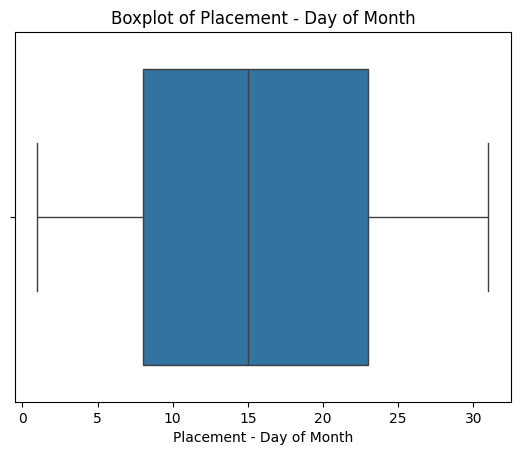

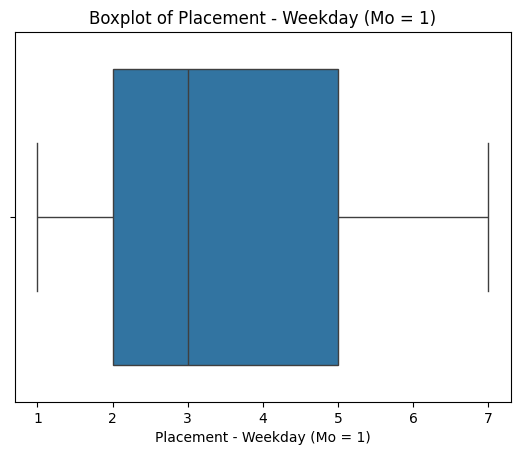

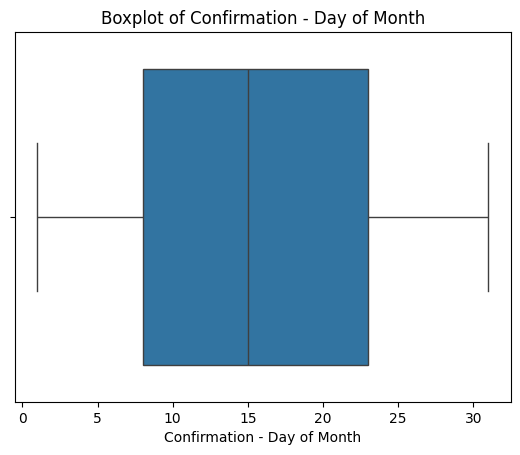

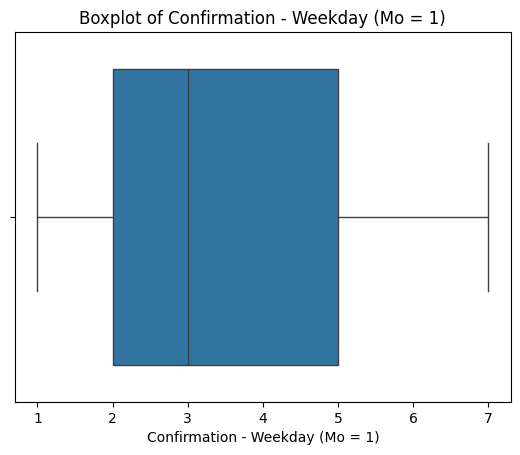

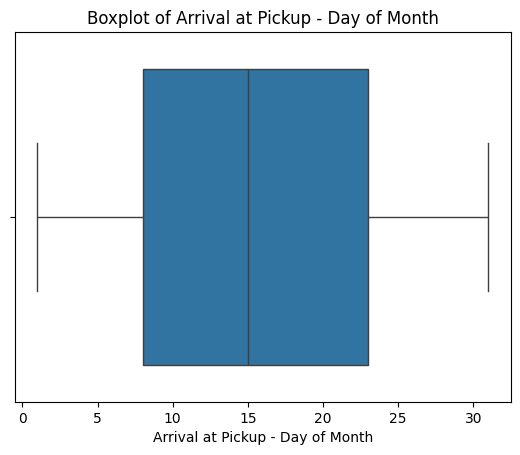

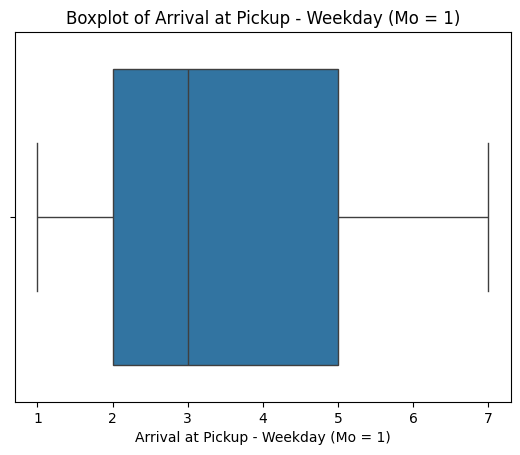

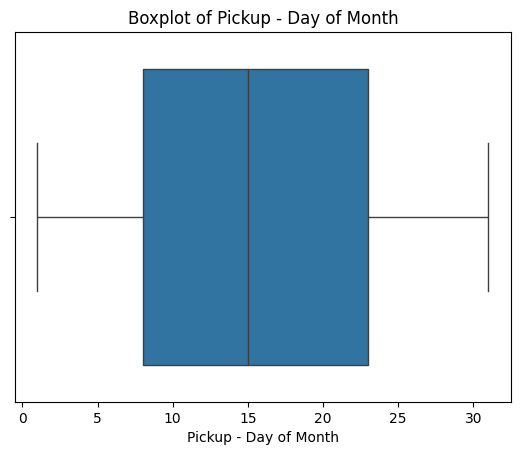

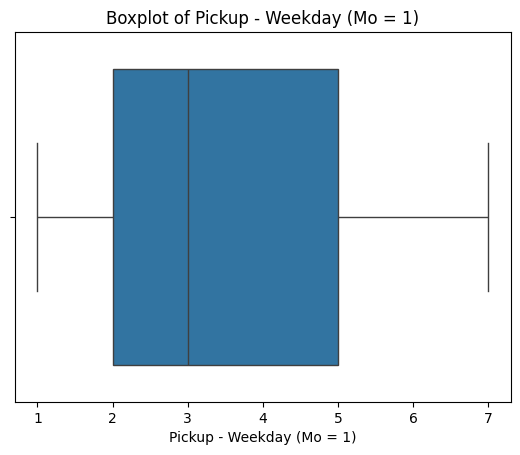

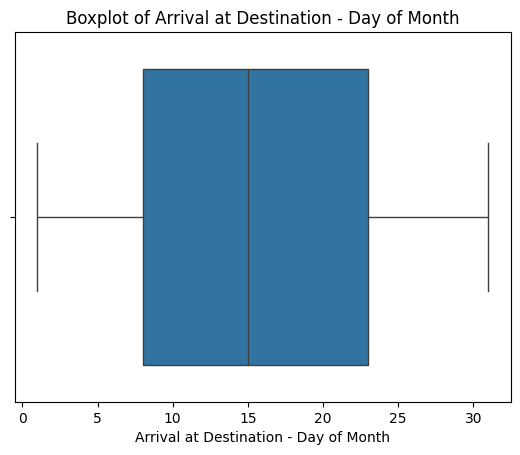

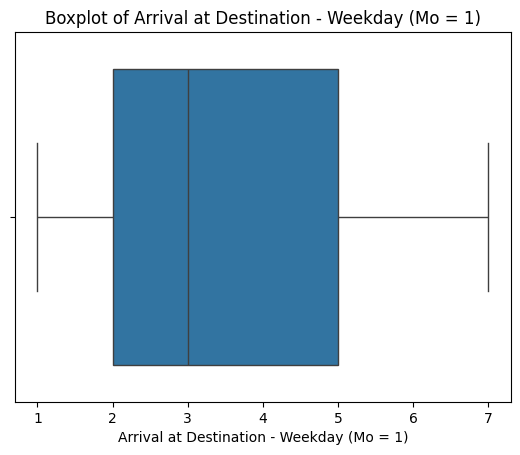

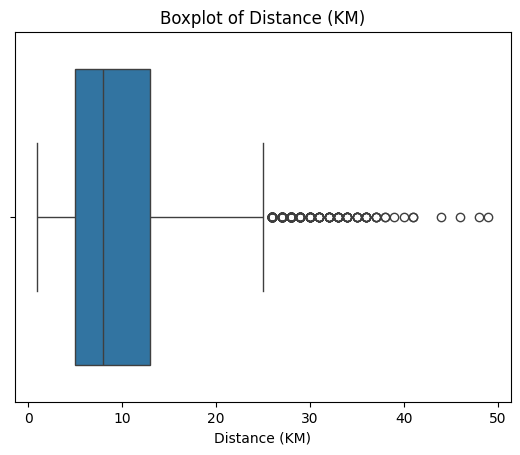

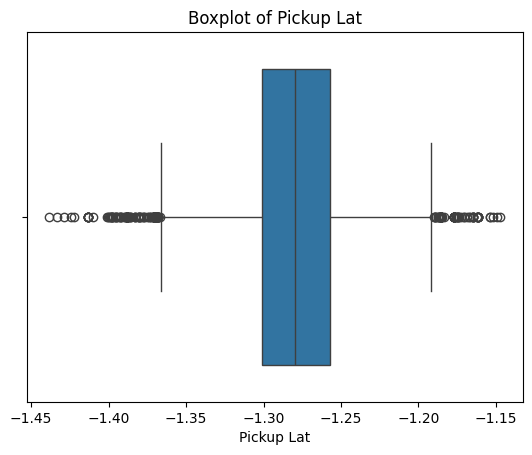

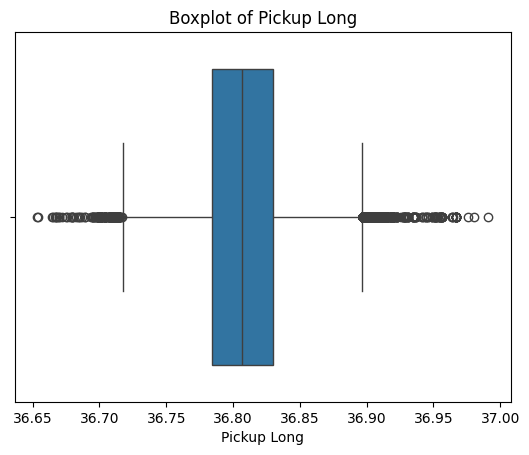

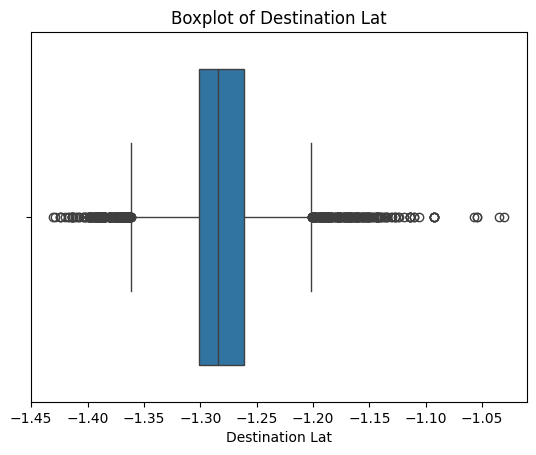

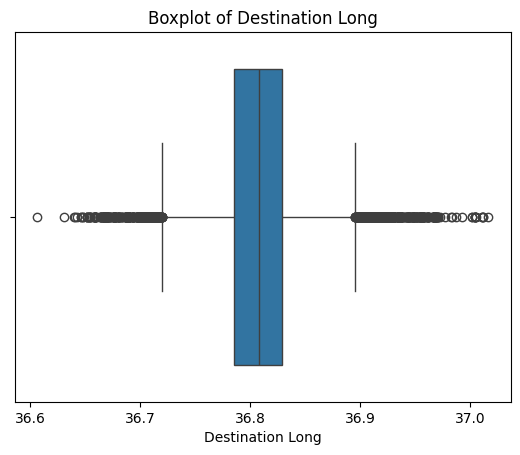

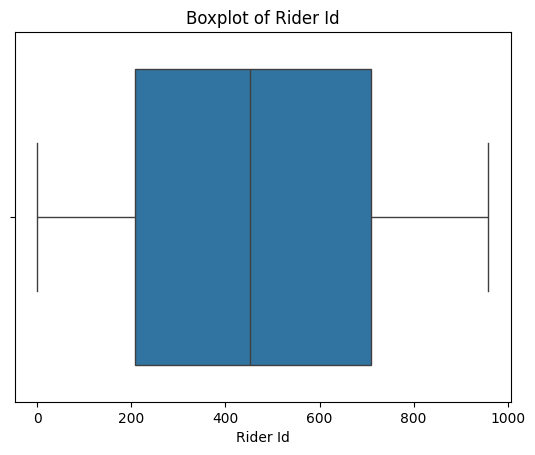

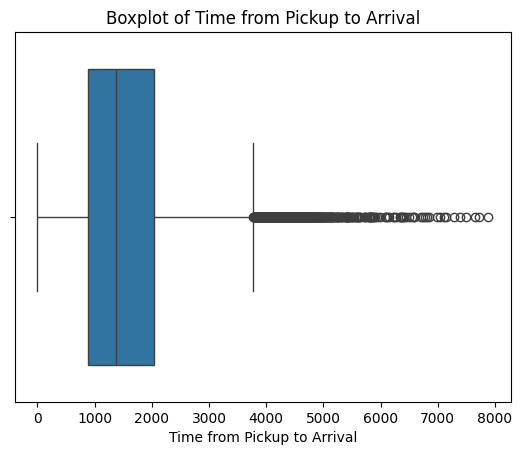

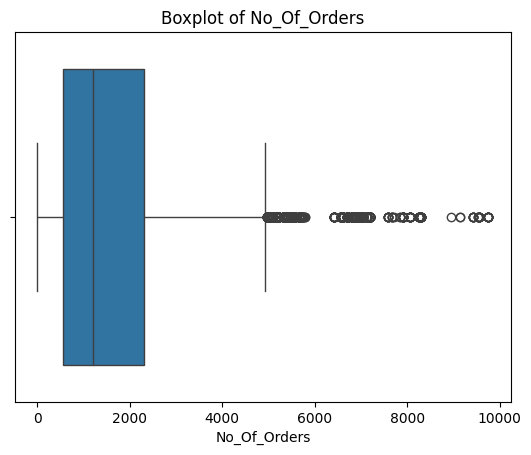

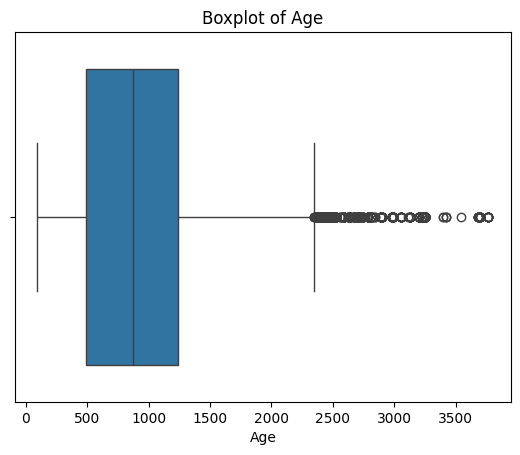

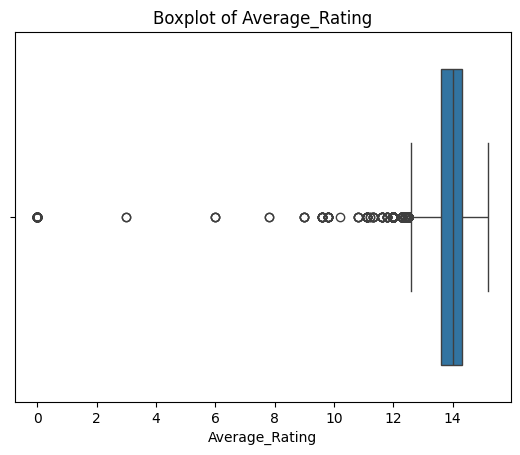

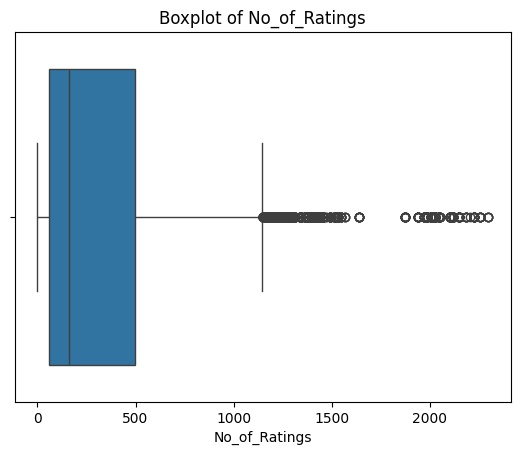

UFuncTypeError: Cannot cast ufunc 'equal' input 0 from dtype('<m8[ns]') to dtype('<m8') with casting rule 'same_kind'

In [628]:
numerical_columns = merged_df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    sns.boxplot(x=merged_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [629]:
merged_df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Time taken', 'Time taken (minutes)',
       'Placement_hour_component', 'Pickup_hour_component',
       'Destination_hour_component', 'rush_hour_placement', 'rush_hour_pickup',
  

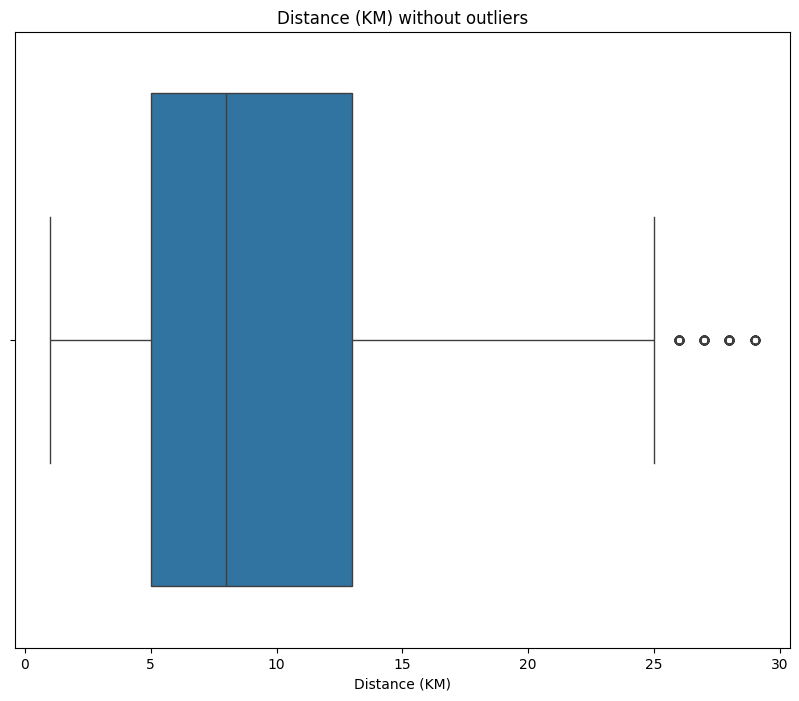

In [630]:
Q1 = merged_df['Distance (KM)'].quantile(0.25)
Q3 = merged_df['Distance (KM)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR


outliers = merged_df[~((merged_df['Distance (KM)'] >= lower_bound) & (merged_df['Distance (KM)'] <= upper_bound))]

merged_df = merged_df[((merged_df['Distance (KM)'] >= lower_bound) & (merged_df['Distance (KM)'] <= upper_bound))]

plt.figure(figsize=(10, 8))
sns.boxplot(x=merged_df['Distance (KM)'])
plt.title('Distance (KM) without outliers')
plt.show()



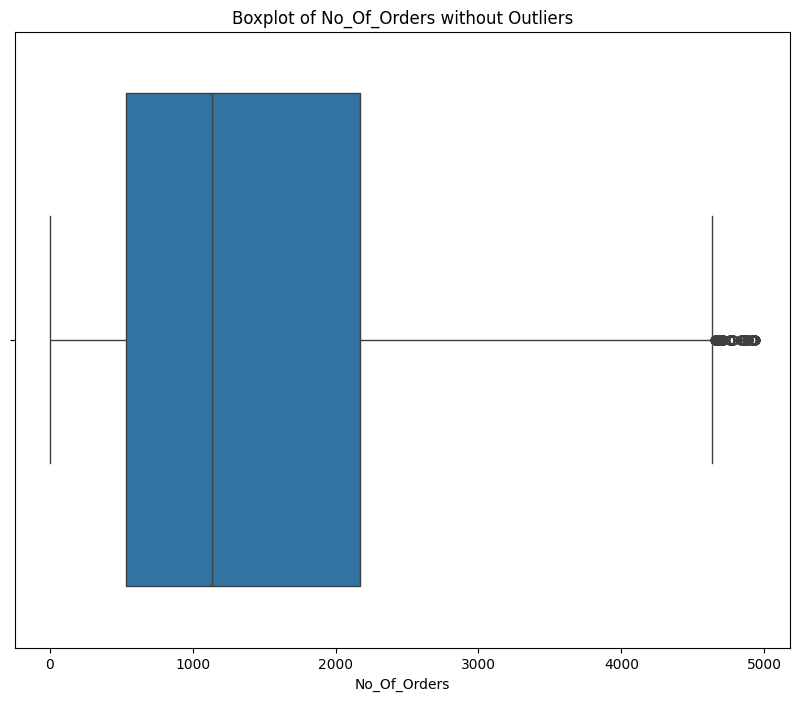

In [631]:
Q1 = merged_df['No_Of_Orders'].quantile(0.25)
Q3 = merged_df['No_Of_Orders'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = merged_df[~((merged_df['No_Of_Orders'] >= lower_bound) & (merged_df['No_Of_Orders'] <= upper_bound))]

merged_df = merged_df[((merged_df['No_Of_Orders'] >= lower_bound) & (merged_df['No_Of_Orders'] <= upper_bound))]

plt.figure(figsize=(10, 8))
sns.boxplot(x=merged_df['No_Of_Orders'])
plt.title('Boxplot of No_Of_Orders without Outliers')
plt.show()

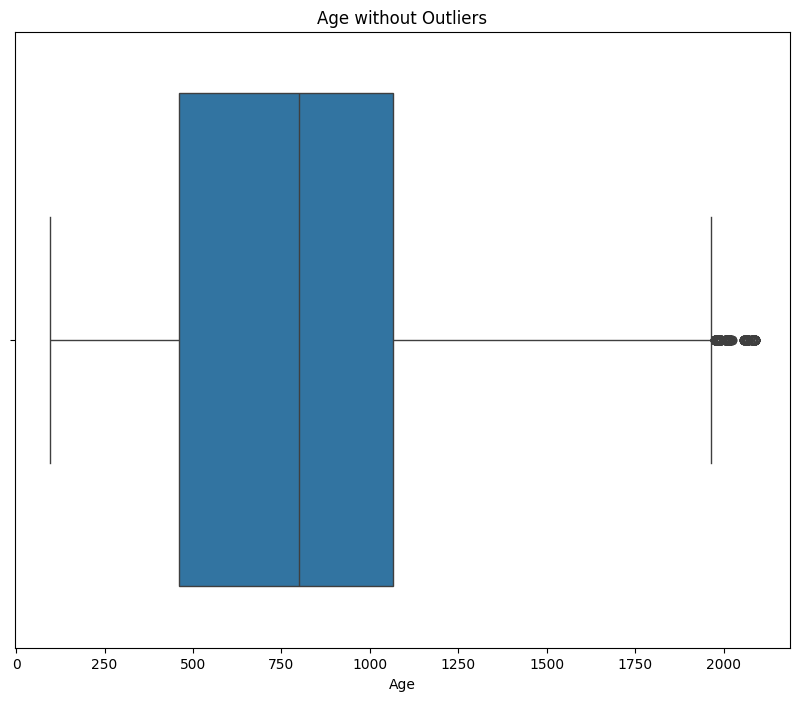

In [632]:
Q1 = merged_df['Age'].quantile(0.25)
Q3 = merged_df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = merged_df[~((merged_df['Age'] >= lower_bound) & (merged_df['Age'] <= upper_bound))]

merged_df = merged_df[((merged_df['Age'] >= lower_bound) & (merged_df['Age'] <= upper_bound))]

plt.figure(figsize=(10, 8))
sns.boxplot(x=merged_df['Age'])
plt.title('Age without Outliers')
plt.show()

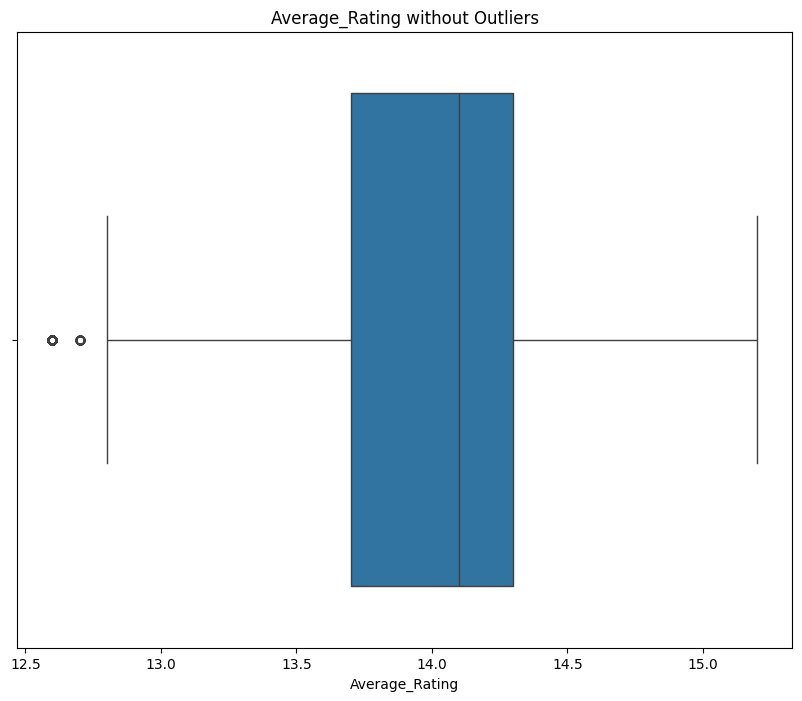

In [633]:
Q1 = merged_df['Average_Rating'].quantile(0.25)
Q3 = merged_df['Average_Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = merged_df[~((merged_df['Average_Rating'] >= lower_bound) & (merged_df['Average_Rating'] <= upper_bound))]

merged_df = merged_df[((merged_df['Average_Rating'] >= lower_bound) & (merged_df['Average_Rating'] <= upper_bound))]

plt.figure(figsize=(10, 8))
sns.boxplot(x=merged_df['Average_Rating'])
plt.title('Average_Rating without Outliers')
plt.show()

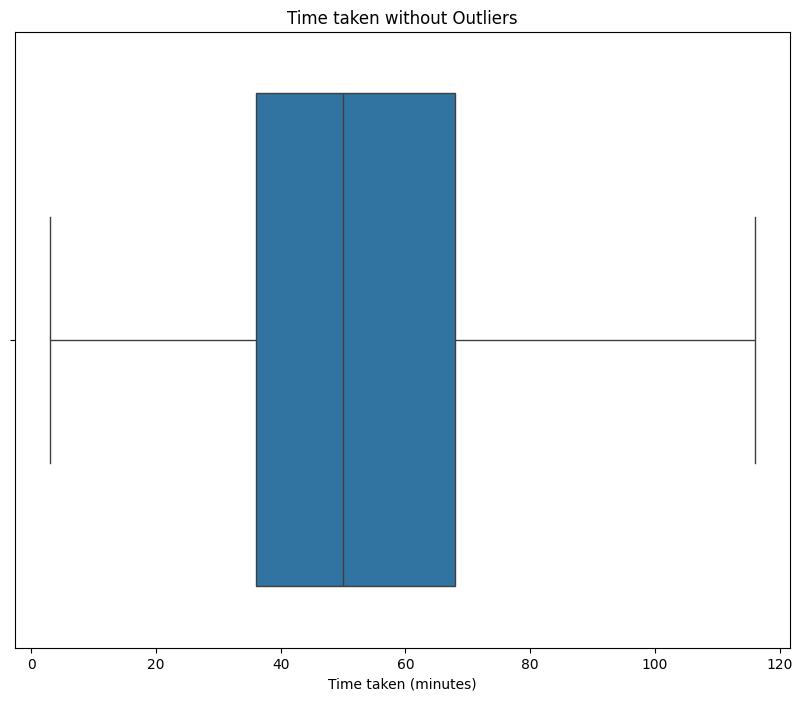

In [636]:
Q1 = merged_df['Time taken (minutes)'].quantile(0.25)
Q3 = merged_df['Time taken (minutes)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = merged_df[~((merged_df['Time taken (minutes)'] >= lower_bound) & (merged_df['Time taken (minutes)'] <= upper_bound))]

merged_df = merged_df[((merged_df['Time taken (minutes)'] >= lower_bound) & (merged_df['Time taken (minutes)'] <= upper_bound))]

plt.figure(figsize=(10, 8))
sns.boxplot(x=merged_df['Time taken (minutes)'])
plt.title('Time taken without Outliers')
plt.show()

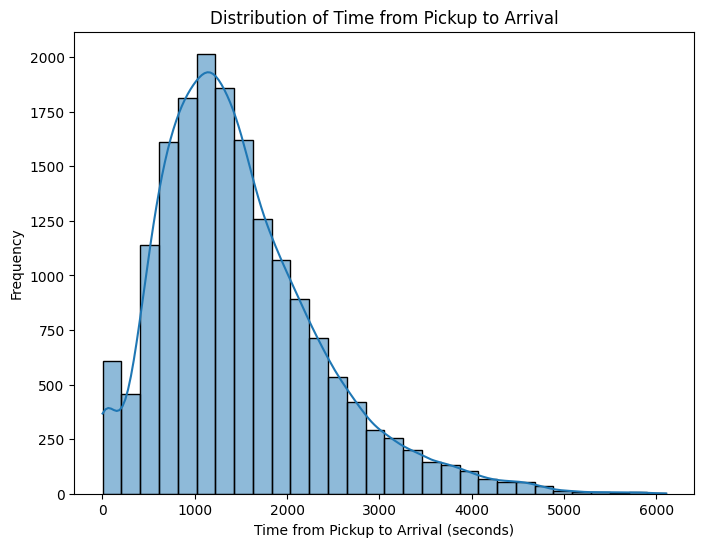

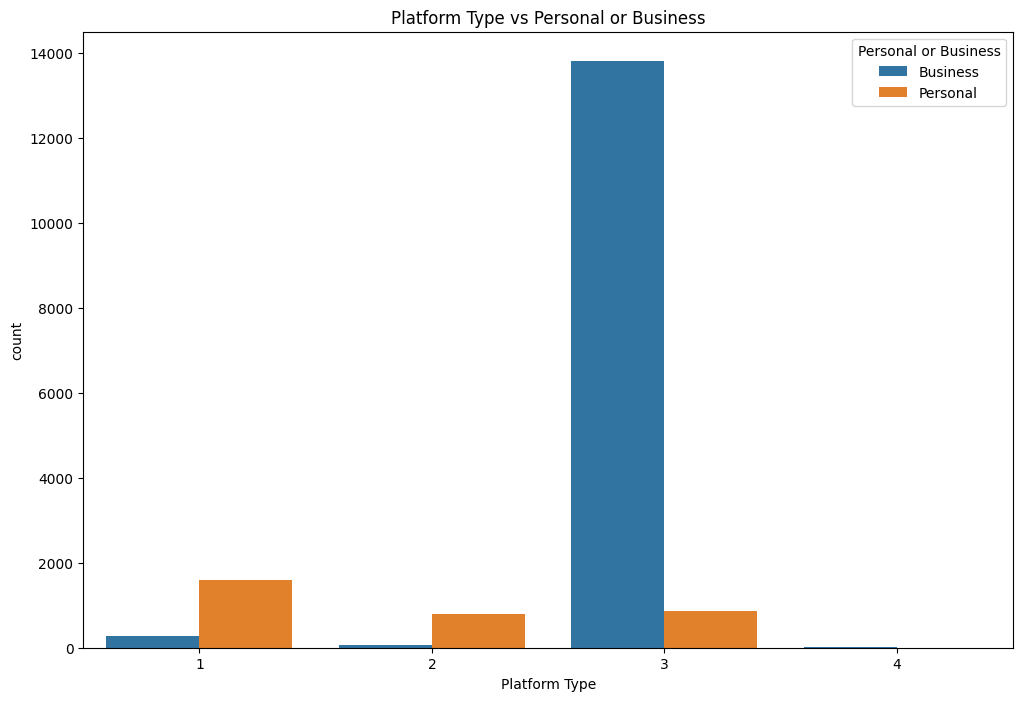

In [637]:
# Distribution of the time taken
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Time from Pickup to Arrival'], bins=30, kde=True)
plt.title('Distribution of Time from Pickup to Arrival')
plt.xlabel('Time from Pickup to Arrival (seconds)')
plt.ylabel('Frequency')
plt.show()

# Visualize categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_df, x='Platform Type', hue='Personal or Business')
plt.title('Platform Type vs Personal or Business')
plt.show()

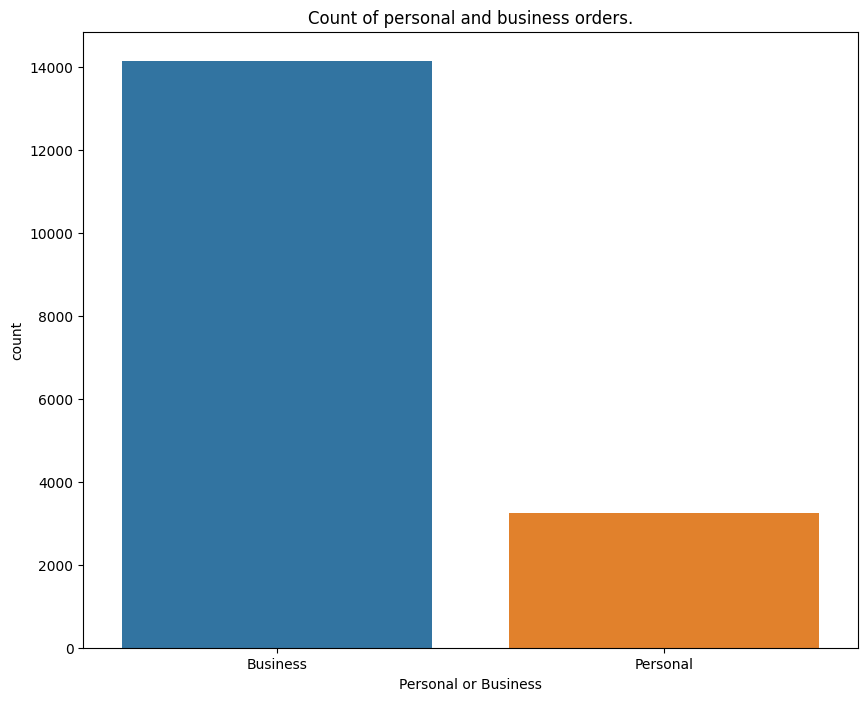

In [638]:
plt.figure(figsize=(10,8))
sns.countplot(data=merged_df,x="Personal or Business", hue = 'Personal or Business')
plt.title("Count of personal and business orders.")
plt.show()

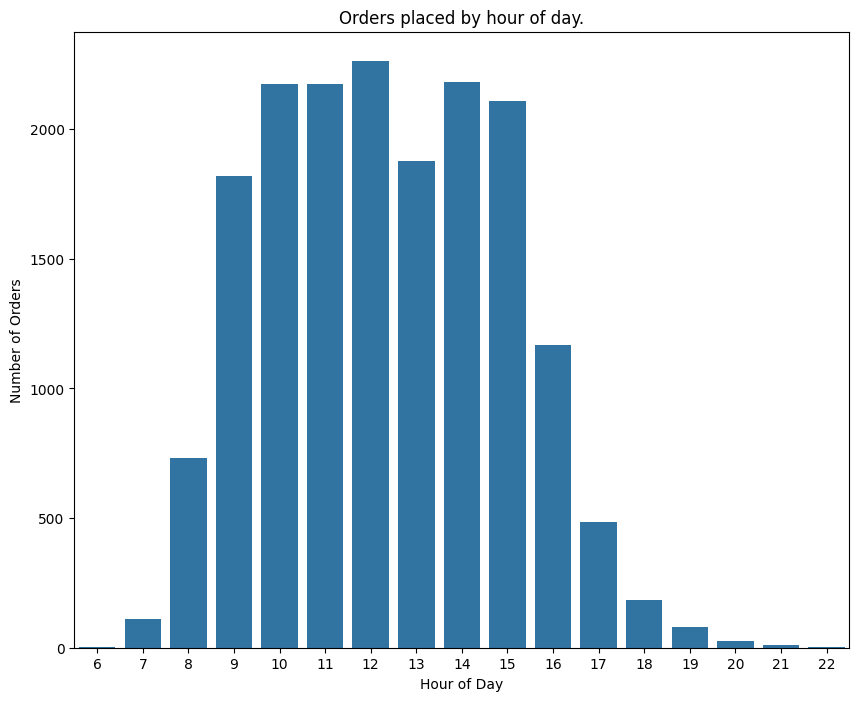

In [639]:
orders_by_hour = merged_df.groupby(merged_df["Placement - Time"].dt.hour)["Order No"].count()
plt.figure(figsize=(10, 8))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.title("Orders placed by hour of day.")
plt.show()


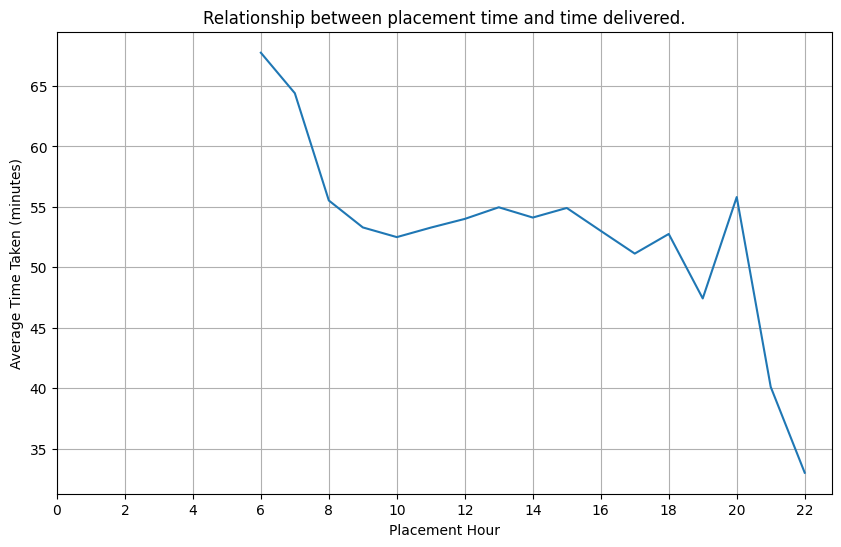

In [640]:
merged_df["Placement Hour"] = pd.to_datetime(merged_df["Placement - Time"]).dt.hour
merged_df["Arrival Hour"] = pd.to_datetime(merged_df["Arrival at Destination - Time"]).dt.hour
grouped_data = merged_df.groupby("Placement Hour")["Time taken (minutes)"].mean()
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel("Placement Hour")
plt.ylabel("Average Time Taken (minutes)")
plt.title("Relationship between placement time and time delivered.")
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()


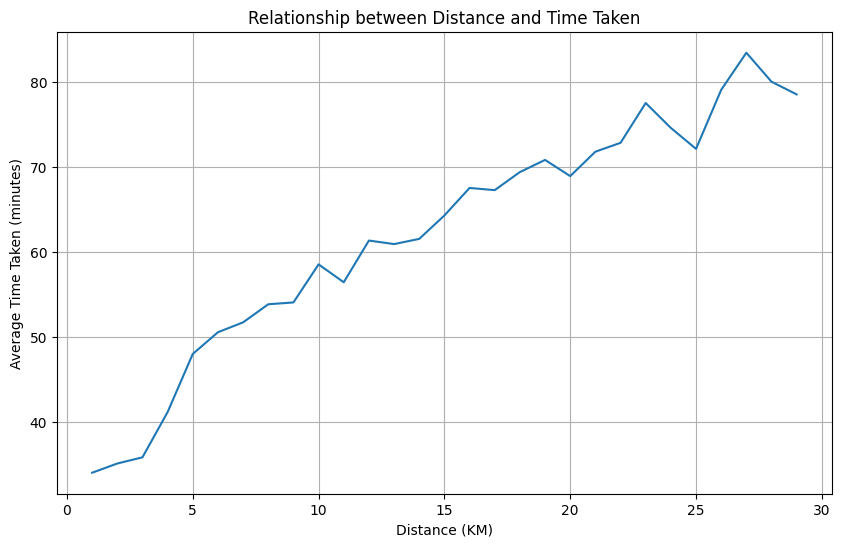

In [641]:
grouped_data =merged_df.groupby("Distance (KM)")["Time taken (minutes)"].mean()
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values)
plt.xlabel("Distance (KM)")
plt.ylabel("Average Time Taken (minutes)")
plt.title("Relationship between Distance and Time Taken")
plt.grid(True)
plt.show()

In [642]:
merged_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Placement_hour_component,Pickup_hour_component,Destination_hour_component,rush_hour_placement,rush_hour_pickup,rush_hour_destination,Area,Area_encoded,Placement Hour,Arrival Hour
0,4211,633,Bike,3,Business,9,5,2024-05-14 09:35:46,9,5,...,9,10,10,False,False,False,City Center,0,9,10
1,27440,2642,Bike,3,Personal,18,5,2024-05-14 15:41:17,18,5,...,15,16,17,False,False,True,Outskirts,2,15,17
2,14170,3339,Bike,3,Business,31,5,2024-05-14 12:51:41,31,5,...,12,13,14,False,False,False,Suburban Area,1,12,14
3,21727,3523,Bike,3,Personal,2,2,2024-05-14 07:12:10,2,2,...,7,7,8,True,True,True,Outskirts,2,7,8
4,8301,87,Bike,2,Personal,22,2,2024-05-14 10:40:58,22,2,...,10,10,11,False,False,False,Suburban Area,1,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21186,19006,1329,Bike,3,Business,6,4,2024-05-14 15:21:59,6,4,...,15,15,15,False,False,False,Outskirts,2,15,15
21188,6655,2195,Bike,3,Business,13,4,2024-05-14 13:02:35,13,4,...,13,13,14,False,False,False,Outskirts,2,13,14
21197,3786,1558,Bike,3,Personal,21,4,2024-05-14 16:33:17,21,4,...,16,17,17,False,True,True,Suburban Area,1,16,17
21199,15575,1346,Bike,3,Business,29,2,2024-05-14 14:31:55,29,2,...,14,14,15,False,False,False,City Center,0,14,15


###### working on models

In [643]:
merged_df["Vehicle Type"]=merged_df["Vehicle Type"].map({"Bike":0})
merged_df["Personal or Business"]=merged_df["Personal or Business"].map({"Personal":0,"Business":1})

In [644]:
merged_df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Time taken', 'Time taken (minutes)',
       'Placement_hour_component', 'Pickup_hour_component',
       'Destination_hour_component', 'rush_hour_placement', 'rush_hour_pickup',
  

In [662]:
X = merged_df.drop('Time taken (minutes)', axis=1)
y = merged_df['Time taken (minutes)']
# splitting data to train and test
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
#selected features based on training set
features = ['Distance (KM)','No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings', 'Placement_hour_component', 'Pickup_hour_component', 'Destination_hour_component', 'rush_hour_placement', 'rush_hour_pickup', 'rush_hour_destination', 'Area_encoded']
target = 'Time taken (minutes)'

In [663]:
# training and test set using 
X_train = X_train[features]
X_test = X_test[features]

###### random forest 

In [666]:
rf_model = RandomForestRegressor(n_estimators=15, min_samples_split=3, min_samples_leaf=4, random_state=42)


In [667]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=3, n_estimators=15,
                      random_state=42)

In [669]:
y_pred=rf_model.predict(X_test)

In [670]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 13.025970498533813
Mean Squared Error: 274.9310257266431
R-squared: 0.4886428007587733


In [673]:
rmse=np.sqrt(mse)
rmse

16.581044168768237

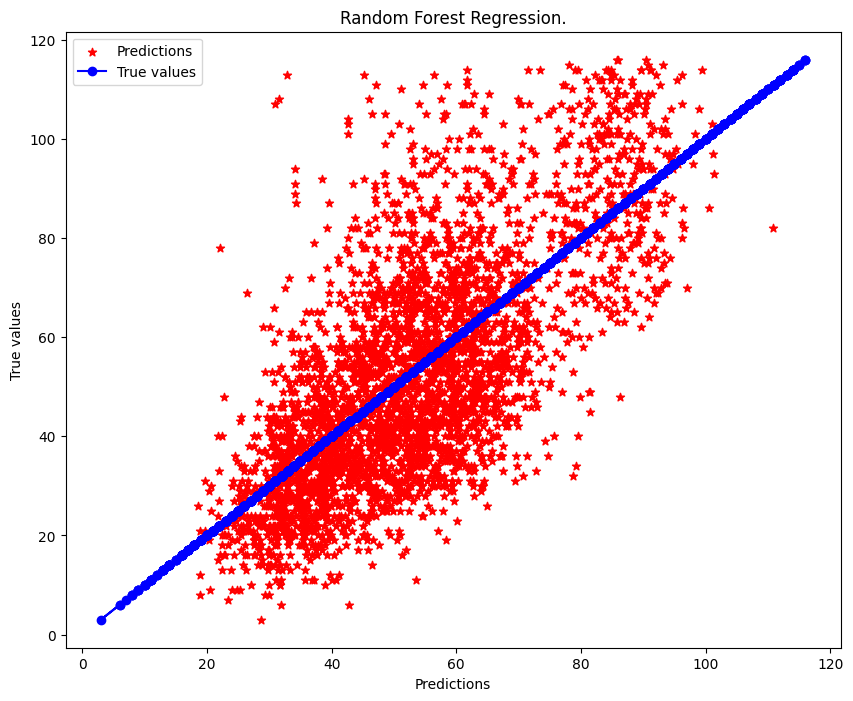

In [677]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test,color="red",marker="*",label="Predictions")
plt.plot(y_test,y_test,color="blue",marker="o",label="True values")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Random Forest Regression.")
plt.legend()
plt.show()

###### hyperparameter tuning

In [689]:
param_grid = {
    'n_estimators': [100, 201],
    'max_depth': [None,10],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', None]
}

In [690]:
# 1. using grid search cv
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

In [692]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 6],
                         'n_estimators': [100, 201]},
             scoring='neg_mean_squared_error', verbose=1)

In [701]:
#2. using randomized search cv
param_dist = {
    'n_estimators': randint(100, 202),  # Inclusive range [100, 201]
    'max_depth': [None, 10],
    'min_samples_split': randint(2, 7),  # Inclusive range [2, 6]
    'min_samples_leaf': randint(1, 4),  # Inclusive range [1, 3]
    'max_features': ['sqrt', None]
}

In [702]:
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)

In [703]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10],
                                        'max_features': ['sqrt', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000291E0463890>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000291F28DE110>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000291DE786B90>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [704]:
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 201}


In [1]:
#print("Best parameters: ", random_search.best_params_)
#best_model = random_search.best_estimator_

NameError: name 'random_search' is not defined